# Classification with Scikit-learn

In this project, I'll be demonstrating different classification algorithms as well as metrics useful for evaluating the models. 

We'll start with a basic overview using the classic iris dataset which tries to classify the species of an iris given petal&sepal length&width. Then we'll use those concepts for predicting a congress member's political party given their voting record. 

In [1]:
#Basic classification on the iris dataset

#Import necessary libraries
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

iris = datasets.load_iris()
sns.set(style="ticks")
df_plot = sns.load_dataset("iris")
print(type(iris))

<class 'sklearn.utils.Bunch'>


In [3]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print(type(iris.data), type(iris.target) )

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
print(iris.data.shape)

(150, 4)


In [8]:
print( iris.target_names)

['setosa' 'versicolor' 'virginica']


In [9]:
df_plot.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


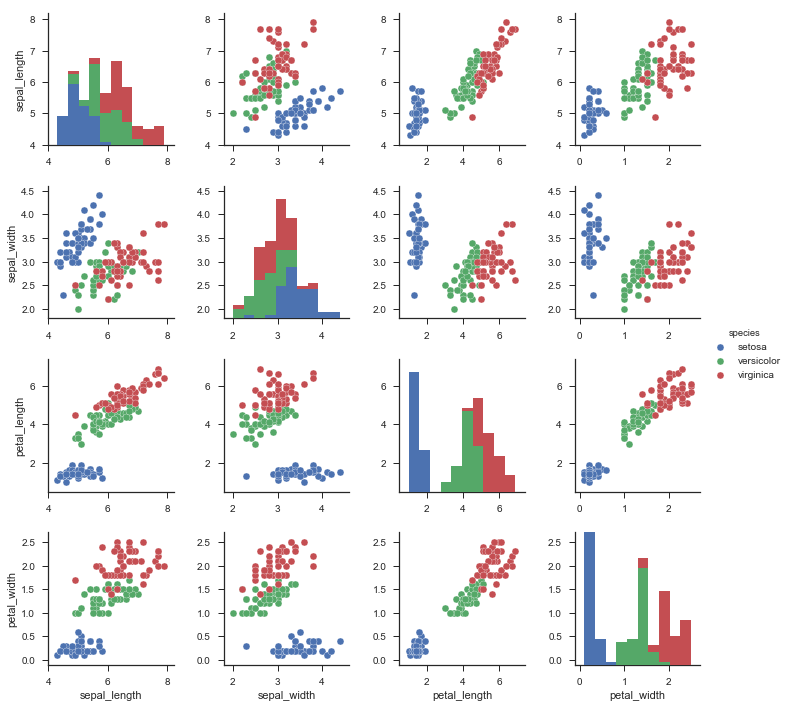

In [10]:
sns.pairplot(df_plot, hue="species")
plt.show()

In [11]:
#Congress voting record
voting = pd.read_csv('./Datasets/house-votes-84.csv',names=['party','infants','water','budget','physician','salvador','religious','satellite','aid','missile','immigration','synfuels','education','superfund','crime', 'duty_free_exports','eaa_sa'])
voting.replace('?', -1, inplace=True)
voting.replace('n', 0, inplace=True)
voting.replace('y', 1, inplace=True)
voting=voting*1
print(voting.head())
print(voting.info())
voting.describe()

        party  infants  water  budget  physician  salvador  religious  \
0  republican        0      1       0          1         1          1   
1  republican        0      1       0          1         1          1   
2    democrat       -1      1       1         -1         1          1   
3    democrat        0      1       1          0        -1          1   
4    democrat        1      1       1          0         1          1   

   satellite  aid  missile  immigration  synfuels  education  superfund  \
0          0    0        0            1        -1          1          1   
1          0    0        0            0         0          1          1   
2          0    0        0            0         1          0          1   
3          0    0        0            0         1          0          1   
4          0    0        0            0         1         -1          1   

   crime  duty_free_exports  eaa_sa  
0      1                  0       1  
1      1                  0      -

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_sa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.00000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.402299,0.337931,0.556322,0.381609,0.452874,0.60000,0.517241,0.521839,0.425287,0.480460,0.296552,0.321839,0.422989,0.531034,0.335632,0.379310
std,0.544342,0.667418,0.545974,0.535928,0.563449,0.53967,0.561065,0.564998,0.588527,0.531462,0.553049,0.601347,0.599866,0.572671,0.593742,0.845718
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the features in this dataset are binary; that is, they are either 0 or 1. 
So a different type of plot would be more useful here, such as Seaborn's countplot.

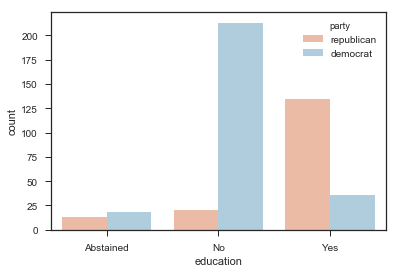

In [12]:
plt.figure()
sns.countplot(x='education', hue='party', data=voting, palette='RdBu')
plt.xticks([0,1,2], ['Abstained', 'No', 'Yes'])
plt.show()

So on the education-spending bill, Republicans were mostly for, but Democrats were mostly against.

How about the mx-missile (Experimental Missile-ended up being the Peacekeeper) bill?

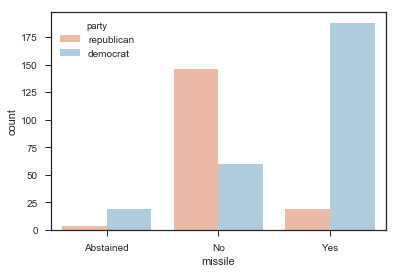

In [13]:
plt.figure()
sns.countplot(x='missile', hue='party', data=voting, palette='RdBu')
plt.xticks([0,1,2], ['Abstained', 'No', 'Yes'])
plt.show()

Now the Republicans were voting against the missile bill while the democrats were overall for it. Feels like this must be an error in the data right? Why are the democrats against education but totally for a new military program? It's actually because the bill attached conditions that the missiles would only be built if the soviets didn't follow their end of a good faith bargain. Republicans didn't want conditions, Democrats did. You can read about it [here:](https://www.govtrack.us/congress/votes/98-1984/h681) 


We'll start our classification process by using the k-nearest neighbors model. This gets it's name from the method it uses where the modeler chooses how many of the nearest neighbors (k) should be used to predict a point's classification. The majority vote decides what the prediction will be. This model from scikit-learn also introduces us to the .fit() and .predict() methods common to all scikit-learn models. We provide training data using the .fit() method, then send new data in the .predict() method and get new predictions based on the training data. 

In [21]:
from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=6)
#knn.fit(iris['data'], iris['target'])
#Out[3]: KNeighborsClassifier(algorithm='auto', leaf_size=30,
# ...: metric='minkowski',metric_params=None, n_jobs=1,
# ...: n_neighbors=6, p=2,weights='uniform')
#iris['data'].shape
#Out[4]: (150, 4)
#iris['target'].shape
#Out[5]: (150,)
#The features need to be in an array where each column is a feature and each 
#row a different observation or data point - in this case, a Congressman's voting record.
#The target needs to be a single column with the same number of observations as the feature data. 

# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = voting['party'].values
X = voting.drop('party', axis=1).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17760704)

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

Now let's predict the labels- we'll use the exact same training set, which isn't the best practice but we're just trying to demonstrate for now and keep it simple. 

In [24]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
X_new=np.array([1,  0,  0,  0,  0,  1, 0, 0,  1,  0,  0,  0,  1,  1,  0,  1]).reshape(1, -1)
X_new

array([[1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1]])

In [26]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)

print("Prediction: {}".format(y_test_pred))
print("Prediction: {}".format(new_prediction))
print("Accuracy on training set: {}".format(np.mean(y_train_pred==y_train)*1))
print("Accuracy on testing set: {}".format(np.mean(y_test_pred==y_test)*1))

Prediction: ['democrat' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'democrat' 'republican' 'democrat' 'republican'
 'republican' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'republican' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'democrat' 'republican' 'democrat' 'democrat'
 'republican' 'republican' 'democrat' 'democrat' 'republican' 'democrat'
 'republican' 'democrat' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'republican' 'democrat' 'democrat' 'republican'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'democrat'
 'democrat' 'republican' 'democrat' 'democrat' 'democrat' 'democrat'
 'democrat' 'democrat' 'democrat' 'republican' 'democrat' 'republican'
 'democrat' 'republican' 'republican' 'republican' 'republican' '

Great! So on our test set, we output all the predicted parties, our specific data point X_new was predicted to be a democrat, and we got a 94% accuracy on the training set, and 91% accuracy on the test set! Let's move on to measuring our model's performance. For the rest of the project, we'll be running KNN on a subset of the classic MNIST digit recognition dataset. 

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

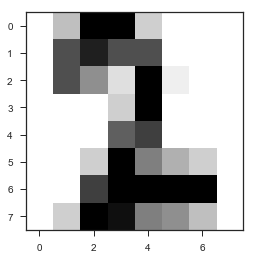

In [30]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1492
plt.imshow(digits.images[1492], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Let's split this dataset into a normal testing and training set, then fit our model and score it.

In [36]:
# Import necessary modules
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=17760704, stratify=y)

# Create a k-NN classifier with 10 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.980555555556


98%! That's nothing to sniff at! Ok, but are we sure 7 neighbors was the best hyperparameter we could have used? Let's try a bunch of other values and see what their relative accuracy scores turn out to be. 

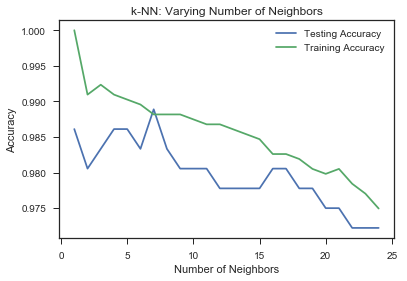

In [35]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 25)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Awesome! Here we can see the effects of the model overfitting (left side-too specific on training set, not enough generalization), vs. an underfitting (right side, too much generalization and not specific enough to differenetiate well). Here we see the testing set gets a max value with 7 neighbors-let's rerun the model and score it:

In [37]:
# Create a k-NN classifier with 10 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.988888888889


Woohoo! 99% accurate! 

# Final Thoughts

In this project, we learned how to conduct exploratory analysis, apply the KNN model to a couple of different problems, split our data into testing/training sets and experiment with different model parameters. We also saw the effects of overfitting and underfitting a model. 